# Preliminary Diagonalization Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Literal

In [2]:
N = 101
h = 1/N


def matrix_from_function(fn : Callable[[int, Callable[[int], np.ndarray]], np.ndarray]):
    eye = np.eye(N)
    out = np.zeros((N,N))
    for i in range(N):
        out[:,i] = fn(i, lambda i: eye[:,i] if 0 <= i < N else np.zeros(N))
    return out

x = matrix_from_function(lambda i,f: i/N*f(i))

x2 = matrix_from_function(lambda i,f: (i/N)**2 * f(i))

dx = matrix_from_function(lambda i,f: (f(i) + f(i+1))/h)

ddx = matrix_from_function(lambda i,f: (f(i+1) - 2*f(i) + f(i-1))/h**2)


In [ ]:
# rho0 = 1
# gamma = 5/3
# k_par = int
# k_perp = m/r  # take into account.... m int
# B_z = 1 - beta * (1 - r^2)^2
#  beta = beta_0 / ( 1 + sqrt(1-beta_0^2))
#  0 < beta_0 < 1


def make_theta_pinch(B_z, rho0, gamma, k_par, k_perp):
    mat = lambda fn: matrix_from_function(fn) # shorthand

    # coordinates: (r, t = theta, z)
    Frr = mat(lambda i,f: f(i)) # ?? how to implement ??
    Frt = mat(lambda i,f: k_perp * (gamma * rho0 + B_z**2 ) * (f(i) + f(i+1))/h)
    Frz = mat(lambda i,f: k_par * gamma * rho0 * (f(i) + f(i+1))/h)
    Ftr = mat(lambda i,f: f(i)) # ?? how to implement ??
    Ftt = mat(lambda i,f: - (k_perp**2 * (gamma * rho0 + B_z**2 ) - k_par**2 * B_z**2 ) * f(i) )
    Ftz = mat(lambda i,f: - k_par * k_perp * gamma * rho0 * f(i))
    Fzr = mat(lambda i,f: f(i)) # ?? how to implement ??
    Fzt = mat(lambda i,f: - k_par * k_perp * gamma * rho0 * f(i))
    Fzz = mat(lambda i,f: - k_par**2 * gamma * rho0 * f(i) )

    return np.block([[Frr, Frt, Frz],
                       [Ftr, Ftt, Ftz],
                       [Fzr, Fzt, Fzz]])

In [4]:
def test_diag():

    mat = make_theta_pinch(1, 2, 3, 4, 5)
    
    
    plt.imshow(np.log(mat+1)) # plot on a log scale to make things show up
    plt.show()

    eigvals, eigvecs = np.linalg.eig(mat)



    plt.hist(np.real(eigvals))
    plt.show()

    # what is a good way of plotting the three-component distribution of an eigenvector?
    

/var/folders/3y/qw16jns97wq1zrfsfkr7j6bh0000gn/T/ipykernel_17956/1414276980.py:6: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(mat+1)) # plot on a log scale to make things show up


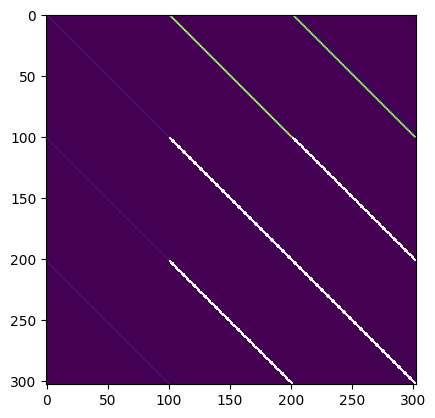

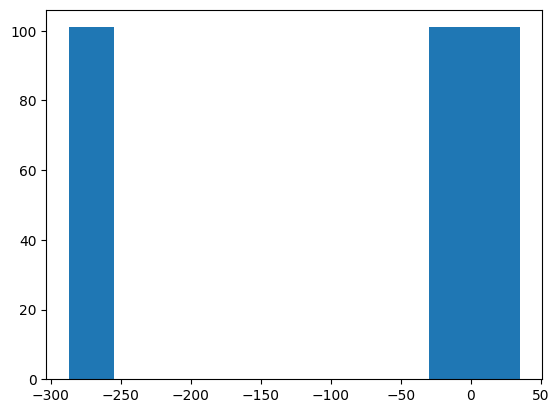

In [5]:
test_diag()

In [21]:
def get_harm_op(N, kind:Literal["X", "P"]):
    out = np.zeros((N,N))

    for i in range(N-1):
        out[i+1,i] = 1
        out[i,i+1] = 1 if kind == "X" else -1

    return np.linalg.norm(out,ord=2)


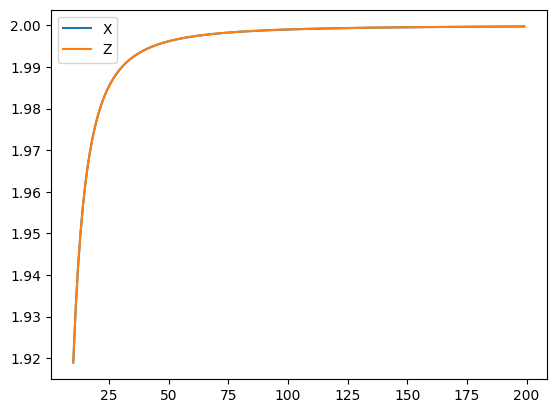

In [24]:
def plot_norm():
    Ns = range(10,200)
    plt.plot(Ns, [get_harm_op(N, "X") for N in Ns], label="X")
    plt.plot(Ns, [get_harm_op(N, "Z") for N in Ns], label="Z")
    plt.legend()
    plt.show()

plot_norm()

